In [1]:
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [2]:
#df = pd.read_csv('D:/BRAC/Thesis/data/Heart_Disease_PredictionVJ.csv')
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
target_col = "target"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

In [57]:
model_ada = AdaBoostClassifier(n_estimators =650, learning_rate =0.2)
model_ada.fit(X_train, y_train)   #, eval_set=[(X_test, y_test)]

AdaBoostClassifier(learning_rate=0.2, n_estimators=650)

In [58]:
y_pred=model_ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.911504424778761

In [44]:
f1_score(y_test, y_pred)

0.9112426035502958

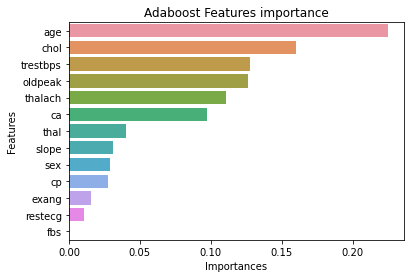

In [45]:
#feature_imp = pd.DataFrame(sorted(zip(model_ada.feature_importances_,X.columns)), columns=['Value','Feature'])
fi=pd.DataFrame({ 'Features':X.columns, 'Importances':model_ada.feature_importances_ })

gp=fi.sort_values(by='Importances', ascending=False)
#print(gp)
sns.barplot(x="Importances", y="Features", data=fi.sort_values(by="Importances", ascending=False))
#plt.tight_layout()
plt.title('Adaboost Features importance')
#plt.bar( gp['Features'],  gp['Importances'])

plt.show()


Confusion matrix:
 [[155  16]
 [ 14 154]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       171
           1       0.91      0.92      0.91       168

    accuracy                           0.91       339
   macro avg       0.91      0.91      0.91       339
weighted avg       0.91      0.91      0.91       339



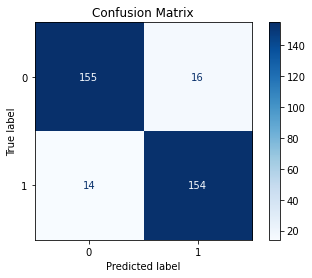

In [46]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',confusion_matrix)
print('\nClassification report:\n',metrics.classification_report(y_test, y_pred))
# plot confusion matrix
disp = metrics.plot_confusion_matrix(model_ada, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.savefig('Confusion Matrix')

In [47]:
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate     #classification error

0.08849557522123896

In [48]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.15, 0.1, 0.005, 0.2, 0.05, 0.3],
     'n_estimators':[100,150,200,650,1000, 300, 400]}

tuning = GridSearchCV(estimator = AdaBoostClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

({'learning_rate': 0.3, 'n_estimators': 650}, 0.9343700412567438)